In [1]:
import torch as tc
import tensorflow as tf
import mxnet as mx
from mxnet import np as mxnp
from mxnet import npx as npx
npx.set_np()
import numpy as np

from d2l import mxnet as mxd2l  # Use MXNet as the backend
from d2l import torch as tcd2l  # Use PyTorch as the backend
from d2l import tensorflow as tfd2l  # Use TensorFlow as the backend

In [2]:
%matplotlib inline

In [1]:
!jupyter nbextension enable varInspector/main

Enabling notebook extension varInspector/main...
      - Validating: ok


In [2]:
!jupyter nbextension enable collapsible_headings/main

Enabling notebook extension collapsible_headings/main...
      - Validating: ok


# 3.1 Linear Regression

In [3]:
timer=mxd2l.Timer()

In [20]:
n=100000
a=np.ones(n)
b=np.ones(n)

In [30]:
c=np.zeros(n)
timer=mxd2l.Timer()
for i in range(n):
    c[i]=a[i]+b[i]
f'{timer.stop():.5f} sec' 

'0.04200 sec'

In [31]:
timer.avg()

0.04199981689453125

In [34]:
timer.cumsum()

[0.04199981689453125]

In [35]:
timer.times

[0.04199981689453125]

In [36]:
c[0:10]

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [37]:
timer.start()
d = a + b
f'{timer.stop():.5f} sec'

'0.00102 sec'

In [38]:
d[0:10]

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [39]:
timer.cumsum(),timer.times

([0.04199981689453125, 0.04302024841308594],
 [0.04199981689453125, 0.0010204315185546875])

# 3.2. Linear Regression Implementation from Scratch

In [4]:
%matplotlib inline
import torch as tc
import tensorflow as tf
import mxnet as mx
from mxnet import np as mxnp
from mxnet import npx as npx
npx.set_np()
import numpy as np

from d2l import mxnet as mxd2l  # Use MXNet as the backend
from d2l import torch as tcd2l  # Use PyTorch as the backend
from d2l import tensorflow as tfd2l  # Use TensorFlow as the backend

tc.__version__,tf.__version__,mx.__version__

('1.6.0', '2.3.1', '1.7.0')

In [5]:
true_w = mxnp.array([2, -3.4])
true_b = 4.2
features, labels = mxd2l.synthetic_data(true_w,true_b,1000)

In [6]:
features.shape,labels.shape

((1000, 2), (1000, 1))

In [7]:
features[0:10]

array([[ 1.1630785 ,  2.2122061 ],
       [ 0.4838046 ,  0.7740038 ],
       [ 0.29956347,  1.0434403 ],
       [ 0.15302546,  1.1839255 ],
       [-1.1688148 ,  1.8917114 ],
       [ 1.5580711 , -1.2347414 ],
       [-0.5459446 , -1.771029  ],
       [-2.3556297 , -0.45138445],
       [ 0.5414402 ,  0.57938355],
       [ 2.6785066 , -1.856082  ]])

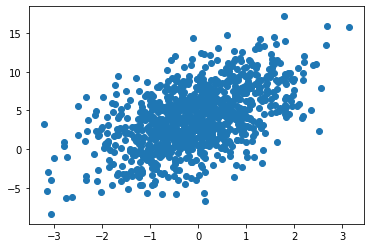

In [8]:
mxd2l.plt.scatter(features[:,0],labels[:,0]);

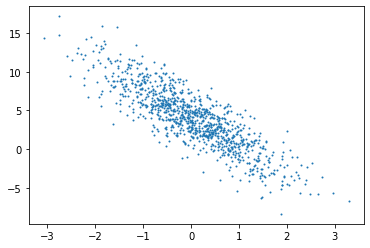

In [9]:
mxd2l.plt.scatter(features[:,1],labels[:,0],1);

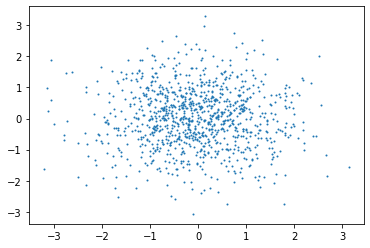

In [10]:
mxd2l.plt.scatter(features[:,0],features[:,1],1);

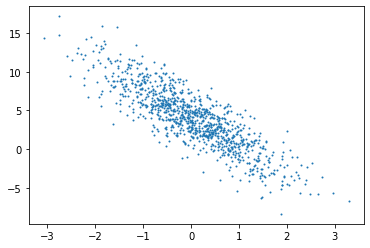

In [11]:
mxd2l.plt.scatter(mxd2l.numpy(features[:, 1]), mxd2l.numpy(labels), 1);

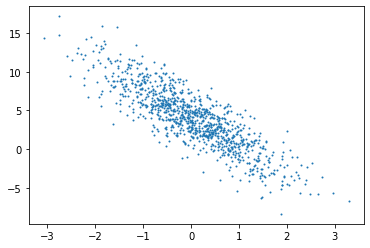

In [12]:
mxd2l.plt.scatter(features[:, 1], labels, 1);

## 3.2.2. Reading the Dataset

In [13]:
import random

### mxnet

In [14]:
true_w_mx = mxnp.array([2, -3.4])
true_b_mx = 4.2
features_mx, labels_mx = mxd2l.synthetic_data(true_w_mx,true_b_mx,1000)

In [109]:
def data_iter_mx(batch_size,features,labels):
    num_examples=len(features)
    indices=list(range(num_examples))  # 必须转变成list
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        batch_indices=mxnp.array(indices[i:min(i+batch_size,num_examples)])
        if i==0:
            print(f"batch_indices.shape={batch_indices.shape},batch_indices= {batch_indices}")
        yield features[batch_indices],labels[batch_indices]    

In [71]:
batch_size = 5
for X, y in data_iter_mx(batch_size, features_mx, labels_mx):
    print(X.shape,  y.shape)
    print(X,"\n",  y)
    break

(5,) [105. 776. 752.  49. 950.]
(5, 2) (5, 1)
[[ 0.53822994  0.15657862]
 [ 0.6676839  -0.5338718 ]
 [ 0.5668887  -0.39027944]
 [ 0.16353652 -0.31873387]
 [ 1.8061298  -0.59092736]] 
 [[4.739031 ]
 [7.3499727]
 [6.6519136]
 [5.620028 ]
 [9.821617 ]]


### torch

In [72]:
true_w_tc = tc.tensor([2, -3.4])
true_b_tc = 4.2
features_tc, labels_tc = tcd2l.synthetic_data(true_w_tc, true_b_tc, 1000)
features_tc.shape, labels_tc.shape

(torch.Size([1000, 2]), torch.Size([1000, 1]))

In [110]:
def data_iter_tc(batch_size,features,labels):
    num_examples=len(labels)
    indices=tc.arange(num_examples)
    indices=list(indices) # 必须转变成list
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        batch_indices=tc.tensor(indices[i:min(i+batch_size,num_examples)])
        if i==0:
            print(f"batch_indices.shape={batch_indices.shape},batch_indices= {batch_indices}")
        yield features[batch_indices], labels[batch_indices]
    

In [74]:
for X, y in data_iter_tc(batch_size, features_tc, labels_tc):
    print(X.shape,  y.shape)
    print(X,"\n",  y)
    break

torch.Size([5]) tensor([263, 406, 543,  55,  53])
torch.Size([5, 2]) torch.Size([5, 1])
tensor([[-0.8302,  1.6058],
        [ 0.5343,  0.0514],
        [-3.0079,  0.2771],
        [-0.4775,  1.5116],
        [-0.5310,  0.4611]]) 
 tensor([[-2.9161],
        [ 5.0950],
        [-2.7486],
        [-1.8815],
        [ 1.5684]])


## tensorflow

In [75]:
true_w_tf = tf.constant([2, -3.4])
true_b_tf = 4.2
features_tf, labels_tf = tfd2l.synthetic_data(true_w_tf, true_b_tf, 1000)
features_tf.shape, labels_tf.shape

(TensorShape([1000, 2]), TensorShape([1000, 1]))

In [76]:
tf.gather(features_tf,[711, 107, 645, 816, 830])

<tf.Tensor: shape=(5, 2), dtype=float32, numpy=
array([[ 0.2402331 , -0.9011917 ],
       [-1.871449  ,  0.214811  ],
       [-0.5835053 , -1.4867499 ],
       [-0.19069244, -0.3429719 ],
       [-0.71324515,  0.21135889]], dtype=float32)>

In [77]:
# features_tf[711, 107, 645, 816, 830]

In [111]:
def data_iter_tf(batch_size,features,labels):
    num_examples=len(labels)
    indices=list(range(num_examples))
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        batch_indices=indices[i:min(i+batch_size,num_examples)]
        if i==0:
            tf.print(f"batch_indices= {batch_indices}")
        yield tf.gather(features,batch_indices),tf.gather(labels,batch_indices)        
        #yield features[batch_indices],labels[batch_indices]  


In [79]:
batch_size = 5
for X, y in data_iter_tf(batch_size, features_tf, labels_tf):
    tf.print("-----------")
    tf.print(X.shape, y.shape)
    tf.print("-----------")
    tf.print(X, '\n', y)
    break

batch_indices:[166, 475, 370, 727, 5]
-----------
TensorShape([5, 2]) TensorShape([5, 1])
-----------
[[-1.15398037 -0.536836803]
 [-1.19190633 0.933767378]
 [1.19315076 -0.806188226]
 [0.102894023 -0.0697023198]
 [-2.11057186 -0.61140722]] 
 [[3.72076702]
 [-1.35099661]
 [9.33956242]
 [4.63352776]
 [2.06527]]


In [80]:
indices1=list(tf.range(3));indices2=list(range(3))

In [81]:
# tf.constant(indices1) # 会报错，因为indices1已经是tf.constant了

In [82]:
tf.constant(indices2)

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([0, 1, 2])>

In [83]:
random.shuffle(indices1);indices1

[<tf.Tensor: shape=(), dtype=int32, numpy=0>,
 <tf.Tensor: shape=(), dtype=int32, numpy=2>,
 <tf.Tensor: shape=(), dtype=int32, numpy=1>]

In [84]:
random.shuffle(indices2);indices2

[2, 0, 1]

In [85]:
tf.gather(features_tf,indices2)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-0.16569339, -1.6336664 ],
       [-0.07698829, -1.0169058 ],
       [ 0.24311784, -0.9521298 ]], dtype=float32)>

In [86]:
tf.gather(features_tf,[0,1,2])

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-0.07698829, -1.0169058 ],
       [ 0.24311784, -0.9521298 ],
       [-0.16569339, -1.6336664 ]], dtype=float32)>

In [87]:
indices1

[<tf.Tensor: shape=(), dtype=int32, numpy=0>,
 <tf.Tensor: shape=(), dtype=int32, numpy=2>,
 <tf.Tensor: shape=(), dtype=int32, numpy=1>]

In [88]:
tf.gather(features_tf,indices1)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-0.07698829, -1.0169058 ],
       [-0.16569339, -1.6336664 ],
       [ 0.24311784, -0.9521298 ]], dtype=float32)>

## 3.2.3. Initializing Model Parameters

### mxnet

In [89]:
w_mx=mxnp.random.normal(0.0,0.01,(2,1))
b_mx=mxnp.zeros(1)
w_mx,b_mx

(array([[-0.01231408],
        [-0.00284909]]),
 array([0.]))

In [90]:
w_mx.attach_grad()
b_mx.attach_grad()

### torch

In [91]:
w_tc=tc.normal(0.,0.01,size=(2,1),requires_grad=True)
b_tc=tc.zeros(1,requires_grad=True)

In [92]:
w_tc,b_tc

(tensor([[-0.0059],
         [-0.0061]], requires_grad=True),
 tensor([0.], requires_grad=True))

### tensorflow

In [158]:
w_tf=tf.Variable(tf.random.normal(shape=(2,1),mean=0,stddev=0.01),trainable=True)
b_tf=tf.Variable(tf.zeros(1),trainable=True)

In [159]:
w_tf,b_tf

(<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
 array([[-0.00208048],
        [-0.00642008]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>)

## 3.2.4 & 5. Defining the Model  /  Defining the Loss Function

### mxnet

In [215]:
def linreg_mx(X,w,b):
    return X@w+b
    #return mxnp.dot(X,w)+b

In [216]:
def squared_loss_mx(y_hat, y):
#     print(f"y_hat_shape:{y_hat.shape}")
    return (y_hat-y.reshape(y_hat.shape))**2/2

### torch

In [217]:
def linreg_tc(X,w,b):
    return X@w+b
    #return tc.matmul(X,w)+b

In [218]:
squared_loss_tc=squared_loss_mx

### tensorflow

In [219]:
def linreg_tf(X,w,b):
    #return tf.matmul(X,w)+b
    return X@w+b

In [220]:
# help(tf.matmul)

In [221]:
def squared_loss_tf(y_hat, y): 
    y_hat_shape=y_hat.shape
#     print(f"y_hat_shape:{y_hat_shape}")
    return (y_hat-tf.reshape(y,y_hat_shape))**2 / 2

## 3.2.6. Defining the Optimization Algorithm

### mxnet

In [222]:
def sgd_mx(params,lr,batch_size):
    for param in params:
        param[:]=param-lr*param.grad/batch_size

### torch

In [223]:
def sgd_tc(params,lr,batch_size):
    for param in params:
        param.data.sub_(lr*param.grad/batch_size)
        param.grad.data.zero_()

### tensorflow

In [224]:
def sgd_tf(params,grads,lr,batch_size):
    for param,grad in zip(params,grads):
        param.assign_sub(lr*grad/batch_size)

## 3.2.7. Training

In [245]:
lr = 0.01
num_epochs = 3
batch_size=10

### mxnet

In [246]:
from mxnet import autograd

In [247]:
net = linreg_mx
loss = squared_loss_mx
for epoch in range(num_epochs):
    for X,y in data_iter_mx(batch_size,features,labels):
        with autograd.record():
            y_hat=net(X,w_mx,b_mx)
            l=loss(y_hat,y)
        l.backward()
        sgd_mx([w_mx,b_mx],lr,batch_size)
    y_hats=net(features,w_mx,b_mx)
    train_l=loss(y_hats,labels)
    print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}, y_hats.shape {y_hats.shape}')

batch_indices.shape=(10,),batch_indices= [236. 603. 902. 212. 985. 222. 504. 861. 934. 815.]
epoch 1, loss 0.000051, y_hats.shape (1000, 1)
batch_indices.shape=(10,),batch_indices= [878. 739. 578. 905.  66. 742. 884. 542. 593. 103.]
epoch 2, loss 0.000051, y_hats.shape (1000, 1)
batch_indices.shape=(10,),batch_indices= [776. 552. 356. 297. 197. 879. 496.  15. 188. 463.]
epoch 3, loss 0.000051, y_hats.shape (1000, 1)


In [248]:
w_mx,b_mx

(array([[ 1.9996084],
        [-3.4003   ]]),
 array([4.1997824]))

In [249]:
# true_w = np.array([2, -3.4])
# true_b = 4.2

### torch

In [250]:
net=linreg_tc
loss=squared_loss_tc
for epoch in range(num_epochs):
    for X,y in data_iter_tc(batch_size,features_tc,labels_tc):
        l = loss(net(X, w_tc,b_tc), y)
        l.sum().backward()
        sgd_tc([w_tc,b_tc],lr,batch_size)
    with tc.no_grad():
        y_hats=net(features_tc,w_tc,b_tc)
        train_l=loss(y_hats,labels_tc)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}, y_hats.shape {y_hats.shape}')
#         train_1=loss(net(features_tc,w_tc,b_tc),labels_tc)
#         print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}, y_hats.shape {y_hats.shape}')

batch_indices.shape=torch.Size([10]),batch_indices= tensor([951, 986, 171, 994, 392, 983, 699, 192, 536, 681])
epoch 1, loss 0.000049, y_hats.shape torch.Size([1000, 1])
batch_indices.shape=torch.Size([10]),batch_indices= tensor([739, 311, 216, 993, 358, 788,  75, 224, 160, 774])
epoch 2, loss 0.000049, y_hats.shape torch.Size([1000, 1])
batch_indices.shape=torch.Size([10]),batch_indices= tensor([596, 997, 832,  88, 968,  57, 439, 554, 203, 982])
epoch 3, loss 0.000049, y_hats.shape torch.Size([1000, 1])


In [251]:
w_tc,b_tc

(tensor([[ 2.0000],
         [-3.4003]], requires_grad=True),
 tensor([4.1999], requires_grad=True))

### tensorflow

In [252]:
lr = 0.01
num_epochs = 3
net = linreg_tf
loss = squared_loss_tf


In [253]:
# linreg_tf??

In [254]:
# loss??

In [255]:
# sgd_tf??

In [256]:
# features_tf[0:10]

In [257]:
# labels_tf[0:10]

In [258]:
# net??

In [259]:
# y_tf=net(features_tf[0:10],w_tf,b_tf)
# y_tf

In [260]:
w_tf,b_tf

(<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
 array([[ 1.9988761],
        [-3.4004917]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([4.1987767], dtype=float32)>)

In [271]:
w_tf=tf.Variable(tf.zeros(shape=(2,1)))
b_tf=tf.Variable(tf.zeros(1),trainable=True)
w_tf,b_tf

(<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
 array([[0.],
        [0.]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>)

In [272]:
# w_tf=tf.Variable(tf.random.normal(shape=(2,1),mean=0,stddev=0.01),trainable=True)
w_tf=tf.Variable(tf.zeros(shape=(2,1)))
b_tf=tf.Variable(tf.zeros(1),trainable=True)
lr=0.01
batch_size=10
num_epochs=3
for epoch in range(num_epochs):
    for X, y in data_iter_tf(batch_size, features_tf, labels_tf):
        with tf.GradientTape() as g:
            l=loss(net(features_tf,w_tf,b_tf),labels_tf)
        dw,db=g.gradient(l,[w_tf,b_tf])
        sgd_tf([w_tf,b_tf],[dw,db],lr,batch_size)
    y_hats=net(features_tf, w_tf,b_tf)
    train_l = loss(y_hats, labels_tf)
    print(f'epoch {epoch + 1}, loss {float(tf.reduce_mean(train_l)):f},y_hats.shape {y_hats.shape}')

batch_indices= [216, 333, 561, 784, 30, 431, 750, 515, 461, 664]
epoch 1, loss 0.000052,y_hats.shape (1000, 1)
batch_indices= [173, 849, 897, 950, 0, 23, 715, 707, 752, 513]
epoch 2, loss 0.000052,y_hats.shape (1000, 1)
batch_indices= [838, 33, 999, 652, 159, 872, 505, 989, 677, 250]
epoch 3, loss 0.000052,y_hats.shape (1000, 1)


In [270]:
w_tf,b_tf

(<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
 array([[ 1.9994975],
        [-3.400505 ]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([4.199357], dtype=float32)>)

In [265]:
true_w = tf.constant([2, -3.4])
true_b = 4.2
print(f'error in estimating w: {true_w - tf.reshape(w_tf, true_w.shape)}')
print(f'error in estimating b: {true_b - b_tf}')

error in estimating w: [0.00050247 0.00050497]
error in estimating b: [0.00064278]


In [266]:
dw,db

(<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
 array([[-4.8981979e-05],
        [ 3.2408163e-05]], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.00012769], dtype=float32)>)

## random.shuffle前必须转变成list

In [71]:
a=tc.arange(10)
b=list(tc.arange(10))
a,b

(tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [tensor(0),
  tensor(1),
  tensor(2),
  tensor(3),
  tensor(4),
  tensor(5),
  tensor(6),
  tensor(7),
  tensor(8),
  tensor(9)])

In [72]:
random.shuffle(a)

In [73]:
a  # 结果取不到所有的数值

tensor([0, 1, 0, 0, 3, 2, 2, 2, 6, 1])

In [74]:
random.shuffle(b)

In [75]:
b 

[tensor(0),
 tensor(1),
 tensor(4),
 tensor(2),
 tensor(3),
 tensor(5),
 tensor(6),
 tensor(9),
 tensor(7),
 tensor(8)]